In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

!ls data/relative

NN_custom_features.durations.npy  NN_custom_features.returns.npy


In [5]:
Y_FILENAME = 'data/relative/NN_custom_features.durations.npy'
y = np.load(Y_FILENAME)
y = pd.Series(y,name='Durations')
y.index.name='episodes'

Z_FILENAME = 'data/relative/NN_custom_features.returns.npy'
z = np.load(Z_FILENAME)
z = pd.Series(z,name='Returns')
z.index.name='episodes'

df = pd.DataFrame([y,z]).transpose()

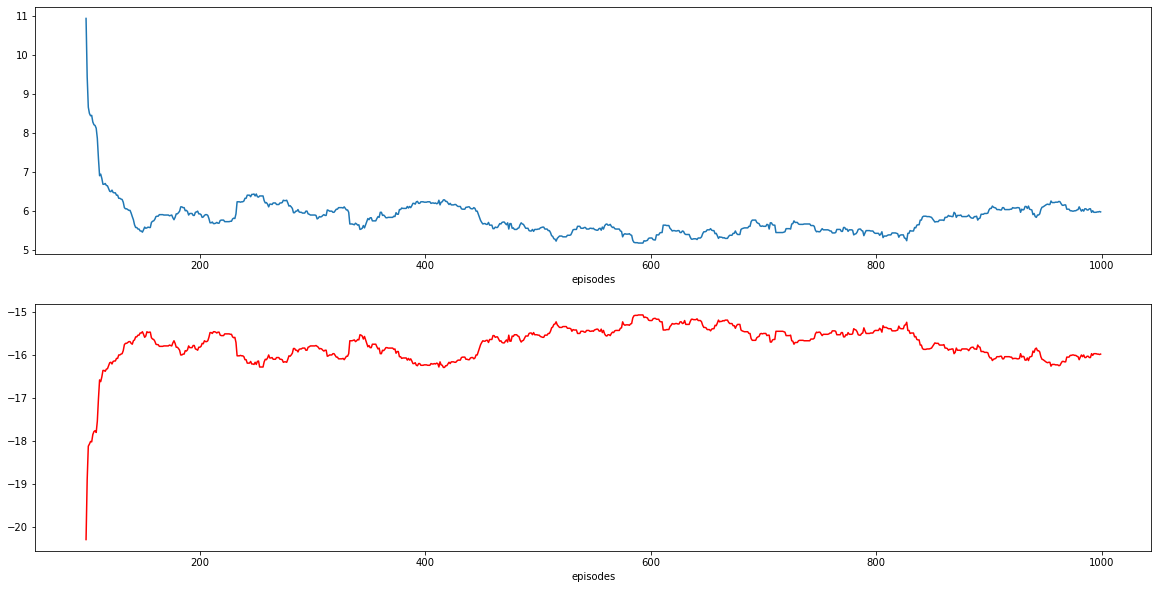

In [6]:
fig,axs=plt.subplots(2,1,figsize=[20,10])
df['Durations'].rolling(100).mean().plot(ax=axs[0]);
df['Returns'].rolling(100).mean().plot(ax=axs[1],color='red');